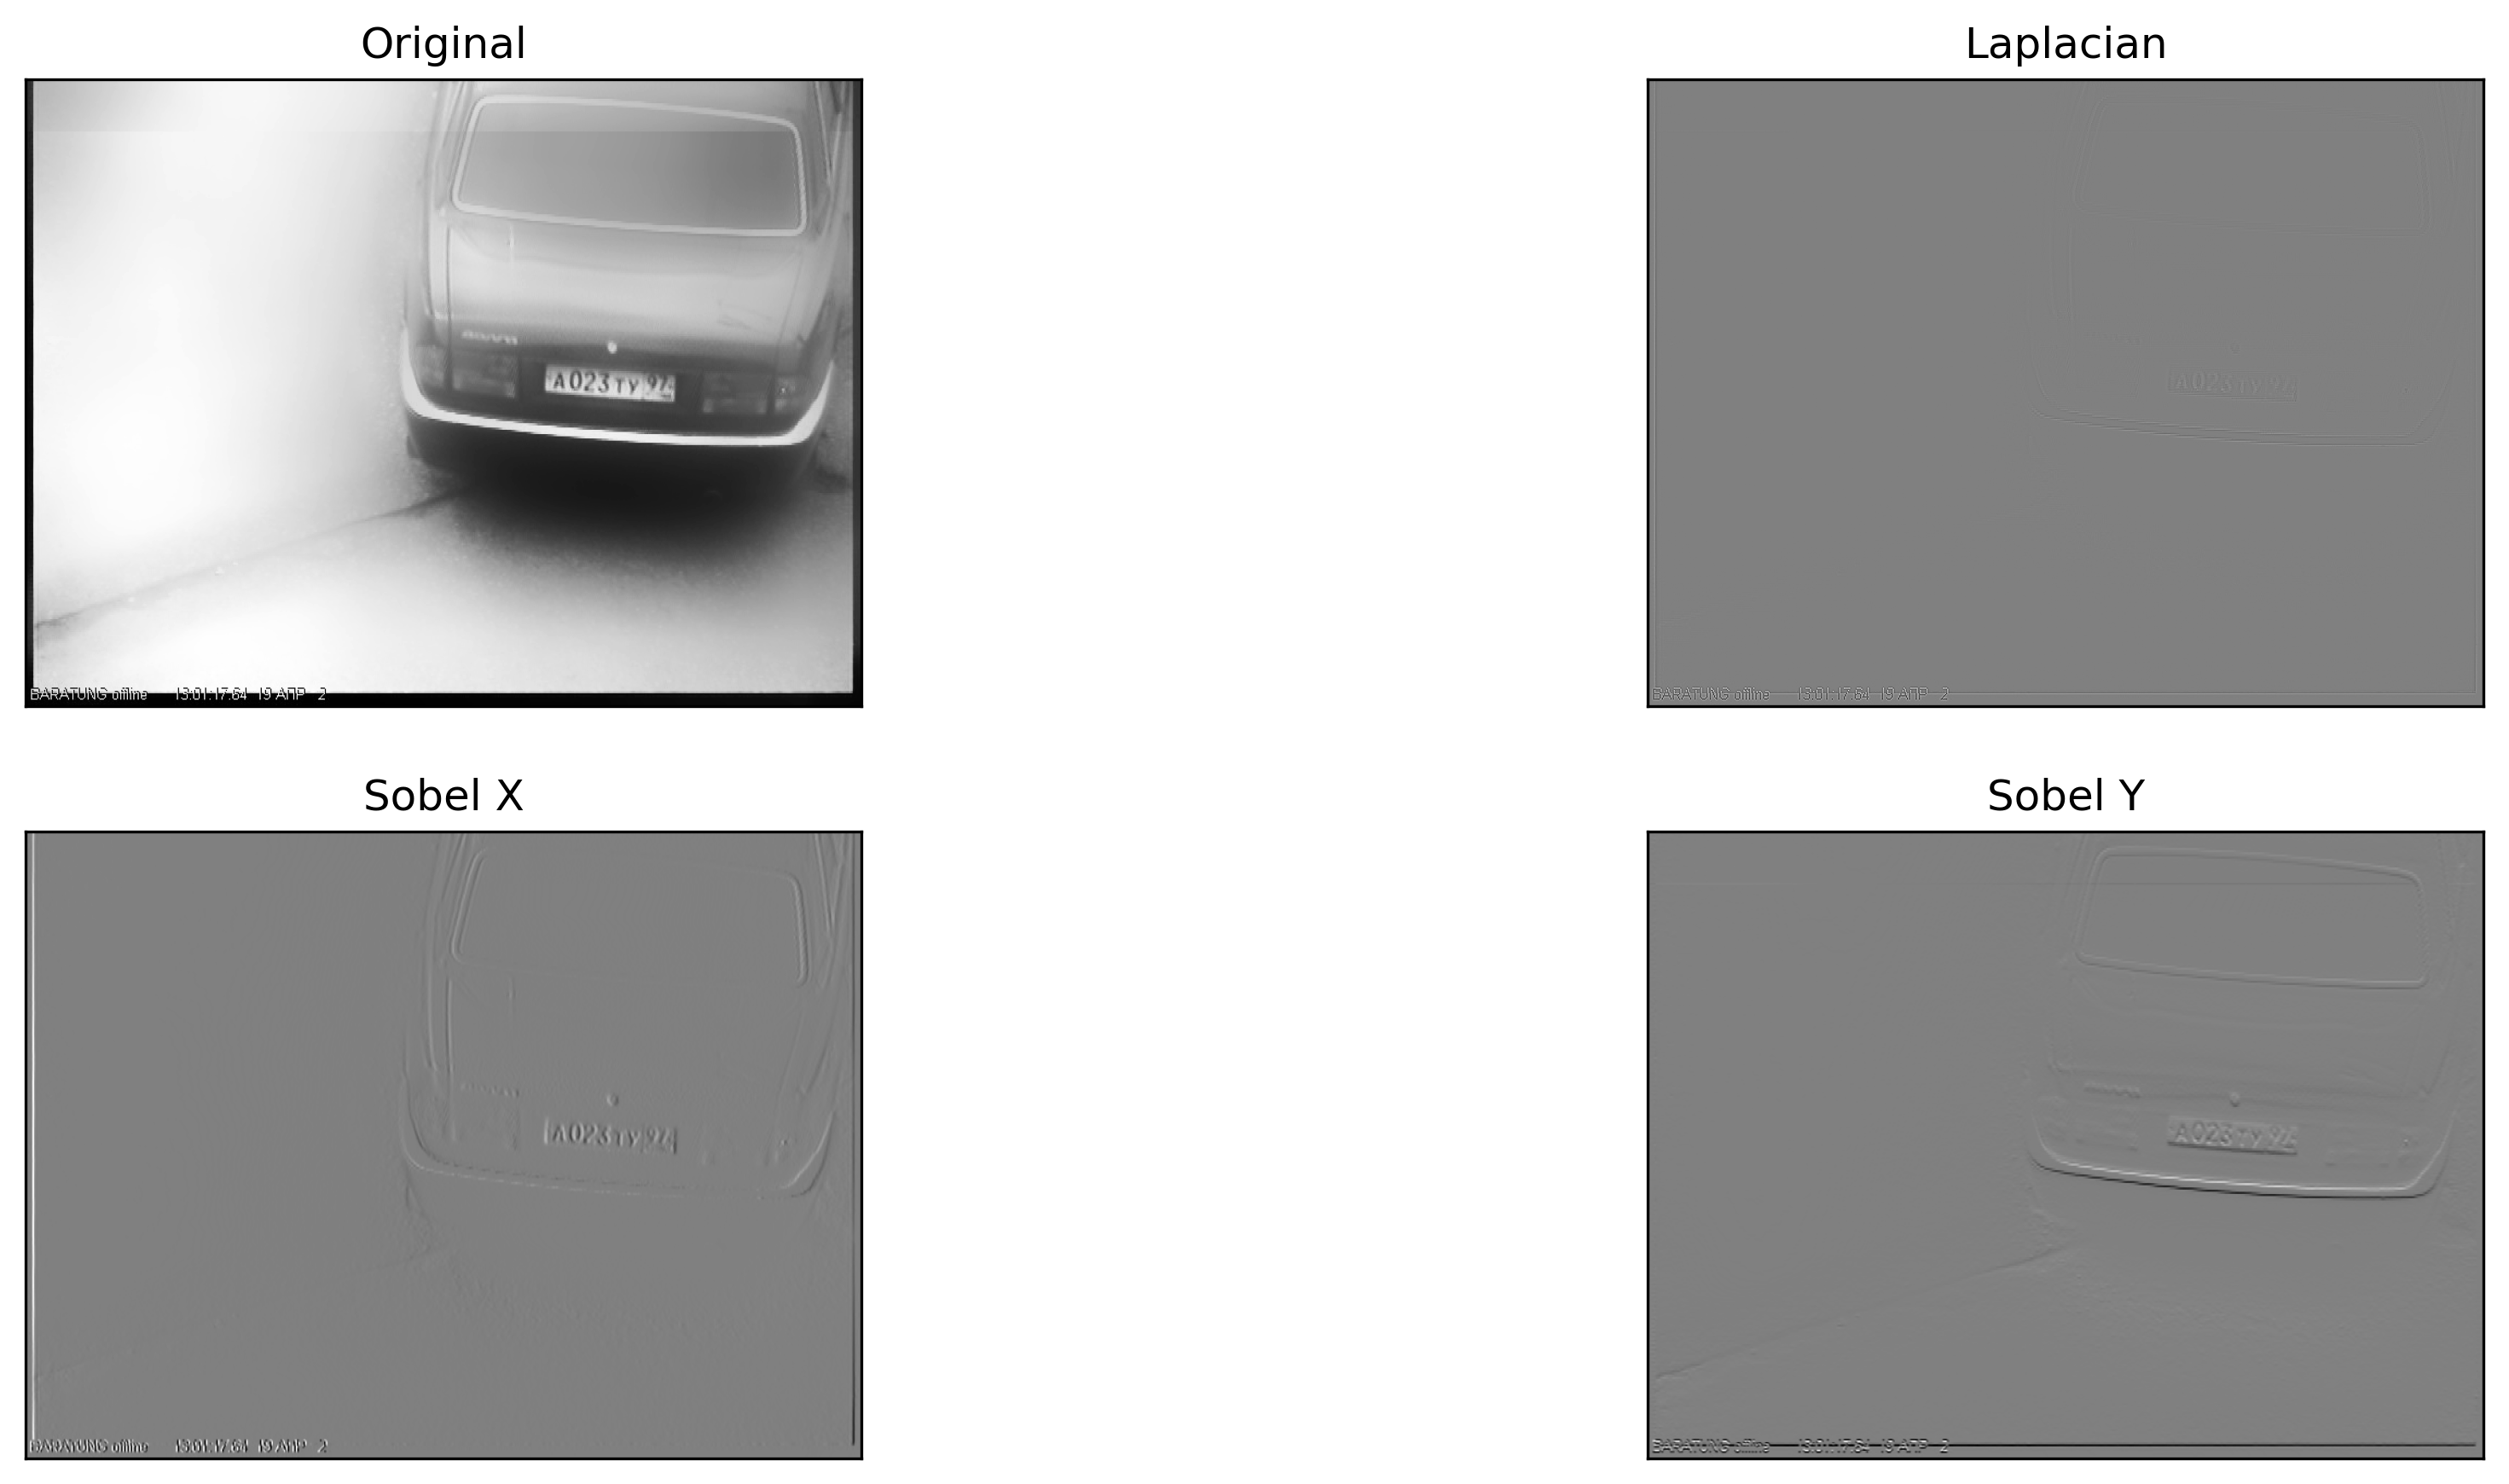

In [57]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('Datasets/train/A023TY97.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

blur = cv.bilateralFilter(img,100,75,75)

laplacian = cv.Laplacian(blur,cv.CV_64F)
sobelx = cv.Sobel(blur,cv.CV_64F,1,0,ksize=3)
sobely = cv.Sobel(blur,cv.CV_64F,0,1,ksize=3)
fig = plt.figure(figsize=(15, 7), dpi=300)
plt.subplot(2,2,1),plt.imshow(blur,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

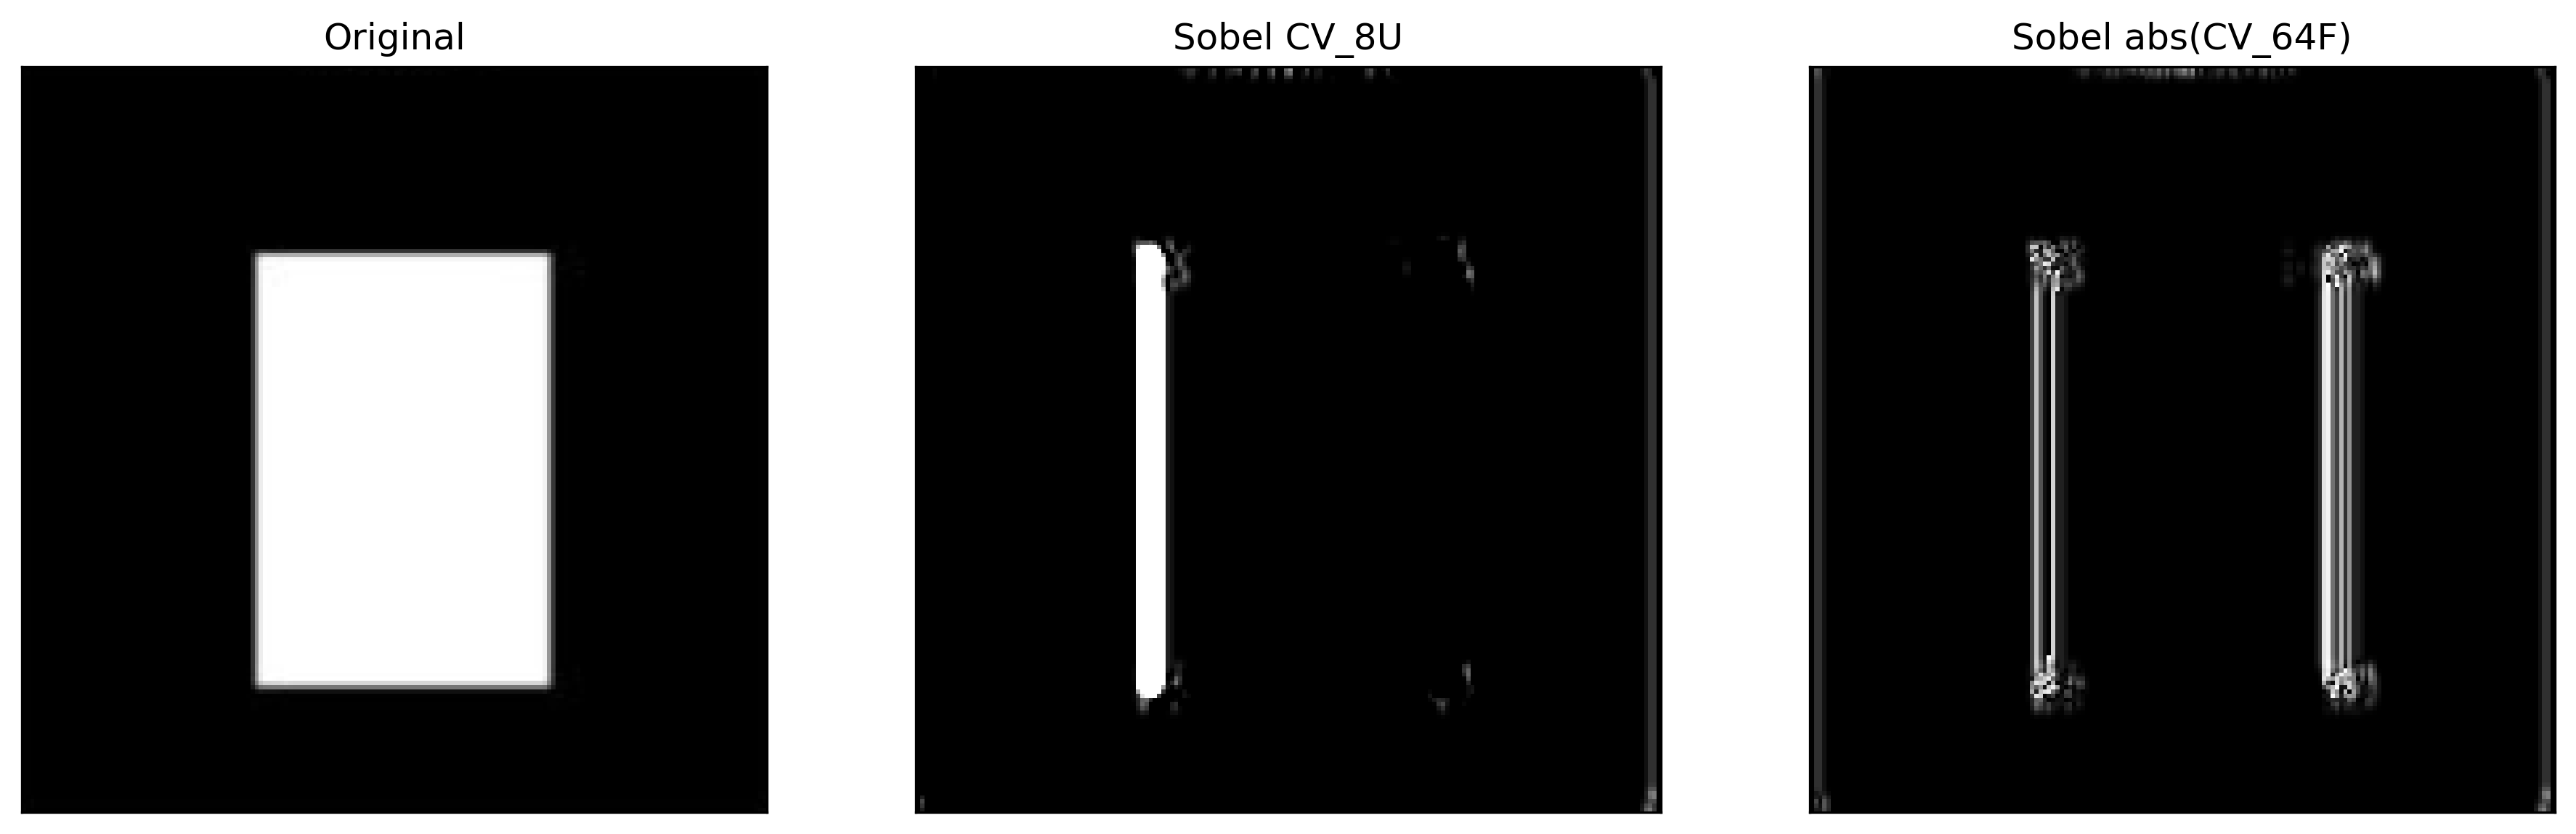

In [58]:
img = cv.imread('C:/Users/sanya/Downloads/box.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# Output dtype = cv.CV_8U

sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
fig = plt.figure(figsize=(15, 7), dpi=300)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

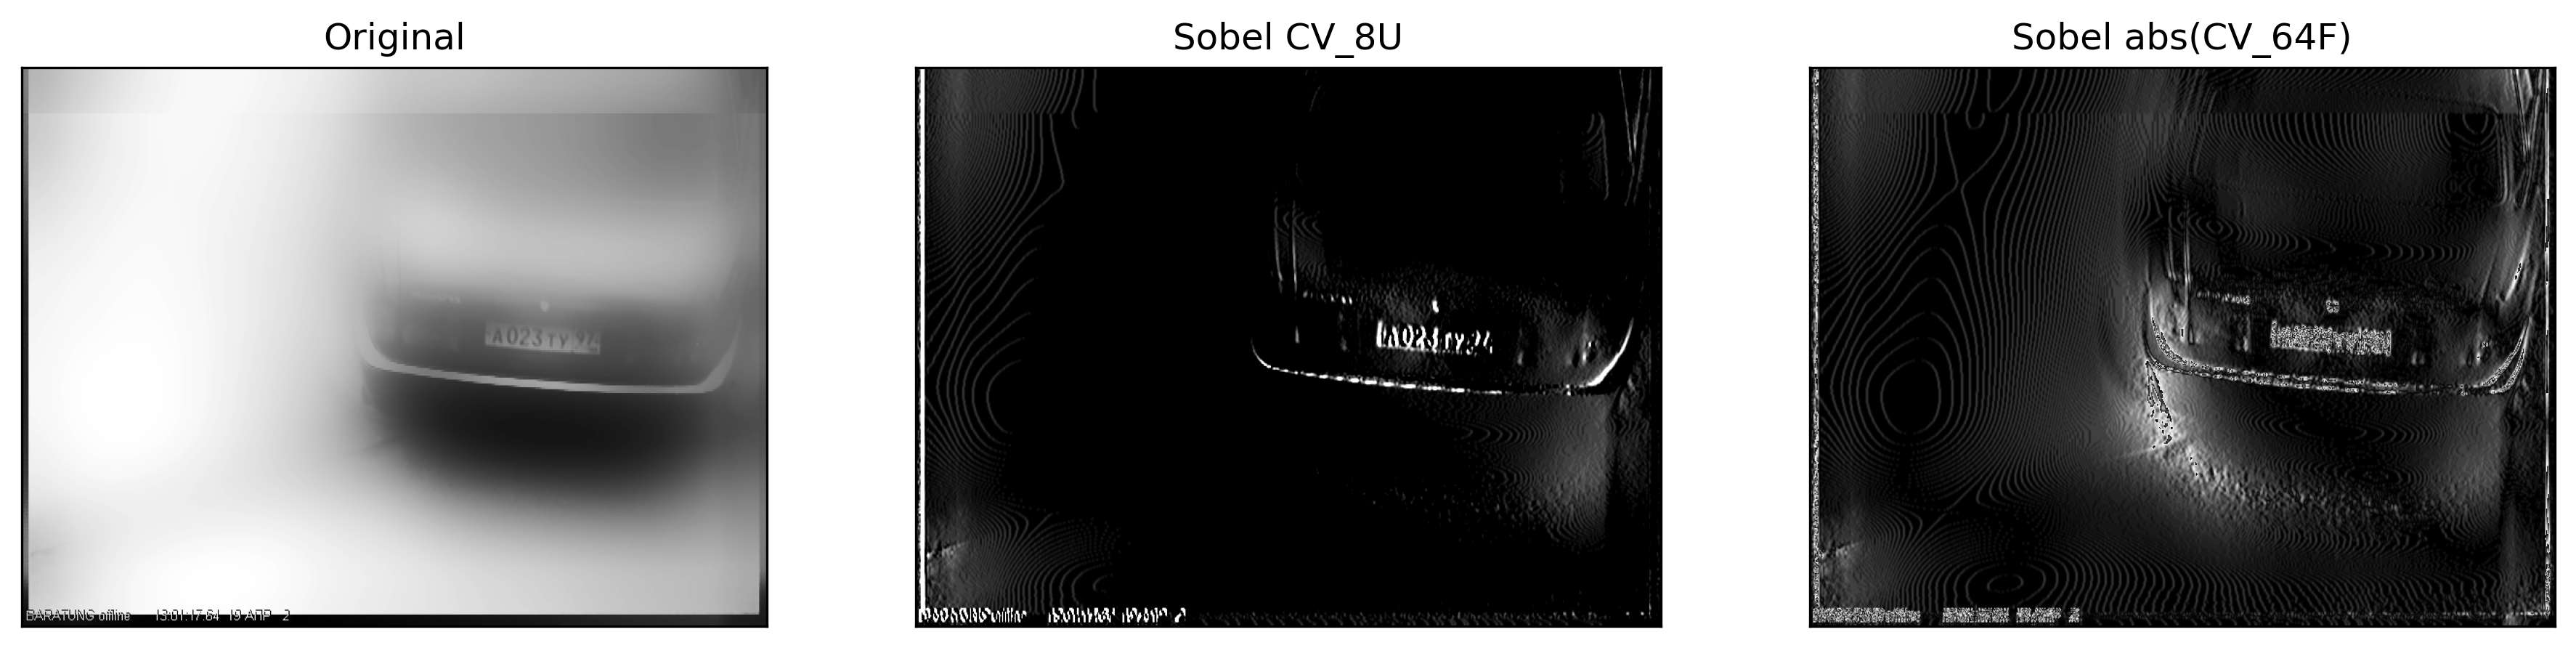

In [59]:

img = cv.imread('Datasets/train/A023TY97.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# Output dtype = cv.CV_8U

blur = cv.bilateralFilter(blur,100,75,75)
sobelx8u = cv.Sobel(blur,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(blur,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
fig = plt.figure(figsize=(15, 7), dpi=300)

plt.subplot(1,3,1),plt.imshow(blur,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

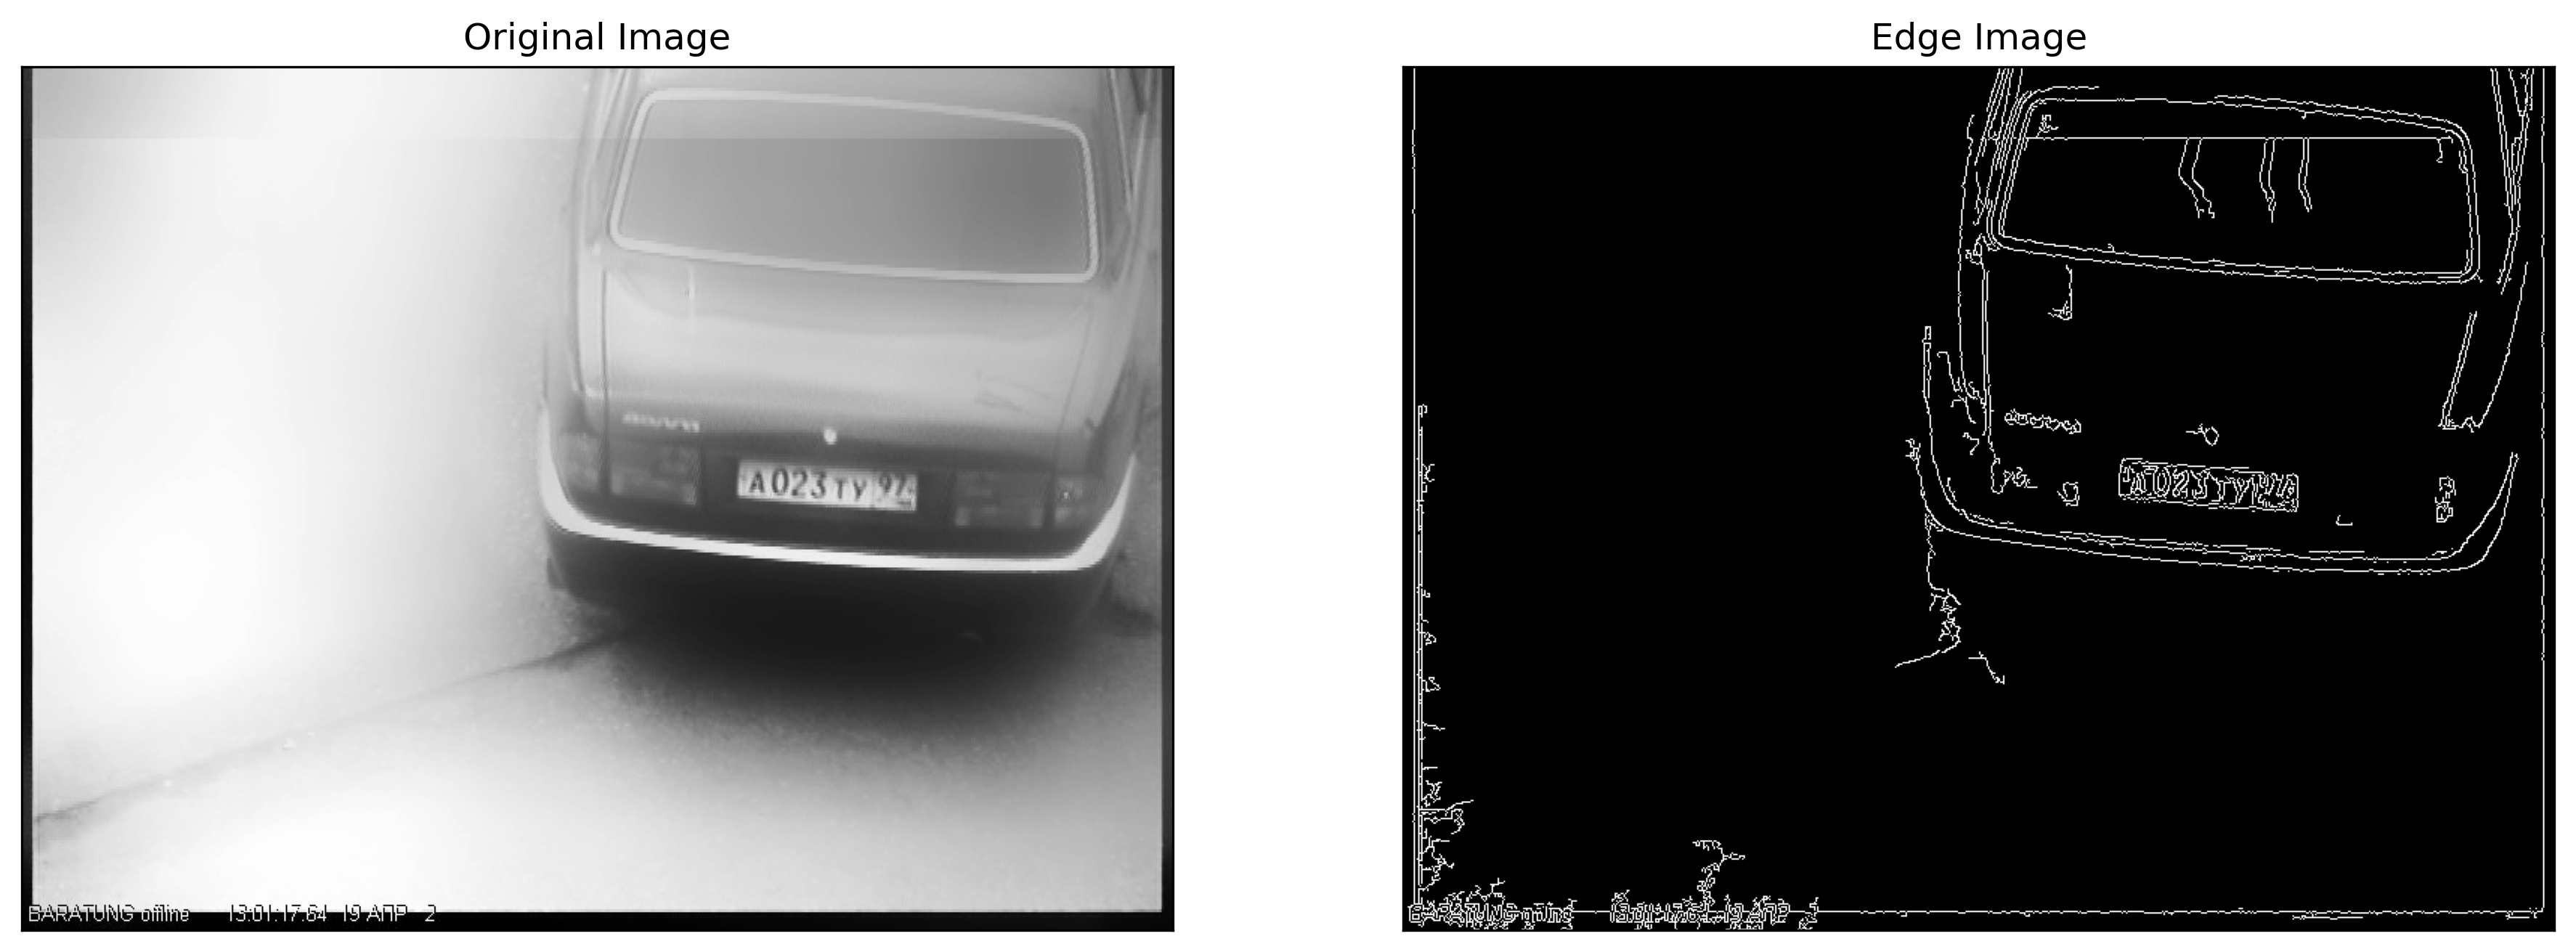

In [60]:

img = cv.imread('Datasets/train/A023TY97.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

blur = cv.bilateralFilter(img,110,75,75)

edges = cv.Canny(blur,1,100)

fig = plt.figure(figsize=(15, 7), dpi=300)

plt.subplot(121),plt.imshow(blur,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [61]:
img = cv.imread('C:/Users/sanya/Downloads/contyr.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
print(img.shape)

(306, 453)


In [62]:
import numpy as np
import cv2 as cv
img = cv.imread('C:/Users/sanya/Downloads/contyr.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh = cv.threshold(img,127,255,0)
contours, hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

{'m00': 126987.0, 'm10': 28974588.833333332, 'm01': 18906773.833333332, 'm20': 8790005798.0, 'm11': 4350717659.583333, 'm02': 3754092540.6666665, 'm30': 2994547978291.5503, 'm21': 1332976968012.4, 'm12': 868201492269.9333, 'm03': 842662401815.4501, 'mu20': 2178881839.9513454, 'mu11': 36764278.641513824, 'mu02': 939110717.449975, 'mu30': -5374964196.106445, 'mu21': 7478205688.236023, 'mu12': 683749422.6982727, 'mu03': 4081393567.6724854, 'nu20': 0.13511860491969407, 'nu11': 0.0022798565529515724, 'nu02': 0.05823690283719429, 'nu30': -0.0009353570356601544, 'nu21': 0.0013013653764749333, 'nu12': 0.00011898680806333183, 'nu03': 0.0007102484871594027}


In [63]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx)
print(cy)

228
148


In [64]:
area = cv.contourArea(cnt)
print(area)

126987.0


In [65]:
perimeter = cv.arcLength(cnt,True)
print(perimeter)

2346.1219234466553


In [66]:
epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)
print(epsilon)
print(approx)

234.61219234466554
[[[  0   0]]

 [[  0 305]]

 [[452 305]]

 [[452   0]]]


In [67]:
hull = cv.convexHull(cnt)
print(hull)

[[[452   0]]

 [[452 305]]

 [[  0 305]]

 [[  0   0]]]


In [68]:
k = cv.isContourConvex(cnt)
print(k)

False


In [69]:
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 254, ..., 253, 252,   0],
       ...,
       [  0,   0, 254, ..., 255, 254,   0],
       [  0,   0, 249, ..., 253, 249,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [91]:
im = cv.imread('C:/Users/sanya/Downloads/PLS.png')
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
edged = cv.Canny(imgray, 30, 200)

contours, hierarchy = cv.findContours(edged,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cnt = contours[1]




AttributeError: 'numpy.ndarray' object has no attribute 'moments'

In [92]:
img = cv.imread('C:/Users/sanya/Downloads/PLS.png')
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edged = cv.Canny(imgray, 30, 200)

contours, hierarchy = cv.findContours(edged,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cnt = contours[1]

cv.imshow("Original Image", img)
k = cv.waitKey(0)

In [94]:
img = cv.imread('C:/Users/sanya/Downloads/PLS.png')
assert img is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edged = cv.Canny(imgray, 30, 200)

contours, hierarchy = cv.findContours(edged,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cnt = contours[1]
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(img,[box],0,(0,0,255),2)

cv.imshow("Original Image", img)
k = cv.waitKey(0)

IndexError: tuple index out of range

In [95]:
img = cv.imread('C:/Users/sanya/Downloads/PLS.png')
assert img is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edged = cv.Canny(imgray, 30, 200)

contours, hierarchy = cv.findContours(edged,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cnt = contours[1]
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cv.circle(img,center,radius,(0,255,0),2)

cv.imshow("Original Image", img)
k = cv.waitKey(0)

In [96]:
img = cv.imread('C:/Users/sanya/Downloads/PLS.png')
assert img is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edged = cv.Canny(imgray, 30, 200)

contours, hierarchy = cv.findContours(edged,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cnt = contours[1]

rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

cv.imshow("Original Image", img)
k = cv.waitKey(0)

In [100]:
img = cv.imread('C:/Users/sanya/Downloads/PLS.png')
assert img is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edged = cv.Canny(imgray, 30, 200)

contours, hierarchy = cv.findContours(edged,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cnt = contours[1]

ellipse = cv.fitEllipse(cnt)
cv.ellipse(img,ellipse,(0,255,0),2)

cv.imshow("Original Image", img)
k = cv.waitKey(0)